In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",50)
plt.rcParams["figure.figsize"]=[10,8]
%matplotlib inline


In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## EDA- Exploratory Data Analaysis

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
df_titanic=pd.concat([train,test],ignore_index=True)
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: >

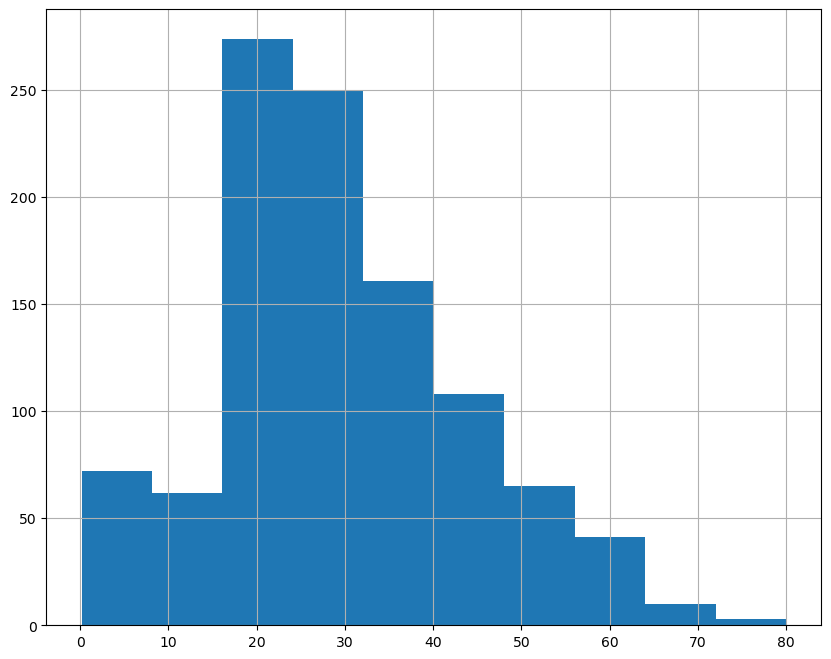

In [8]:
df_titanic["Age"].hist()

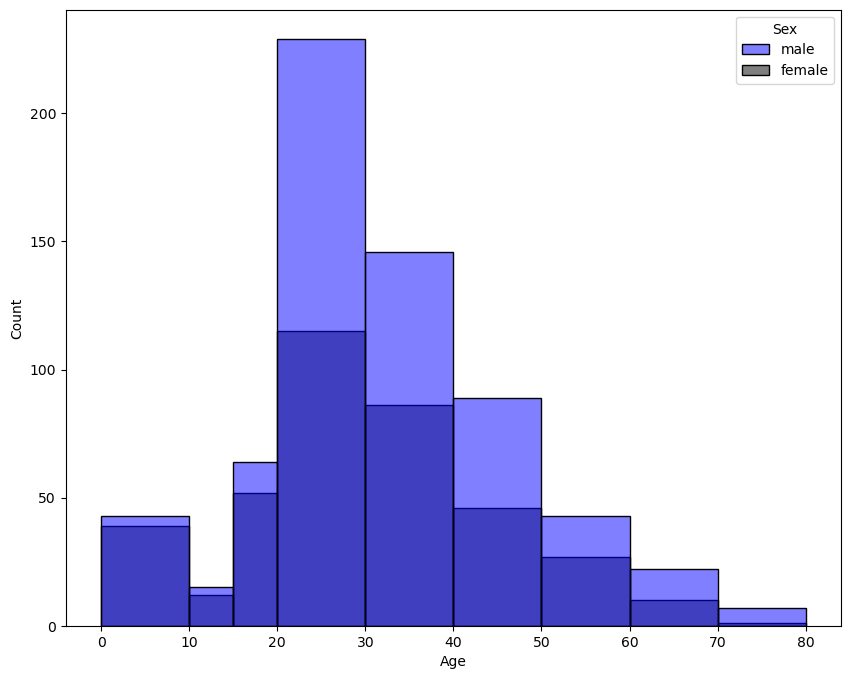

In [9]:
sns.histplot(x="Age",data=df_titanic,bins=[0,10,15,20,30,40,50,60,70,80],
        hue="Sex",
        palette=["blue","black"])
plt.show()


In [10]:
me=df_titanic["Age"].mean()
md=df_titanic["Age"].median()
mo=df_titanic["Age"].mode()[0]

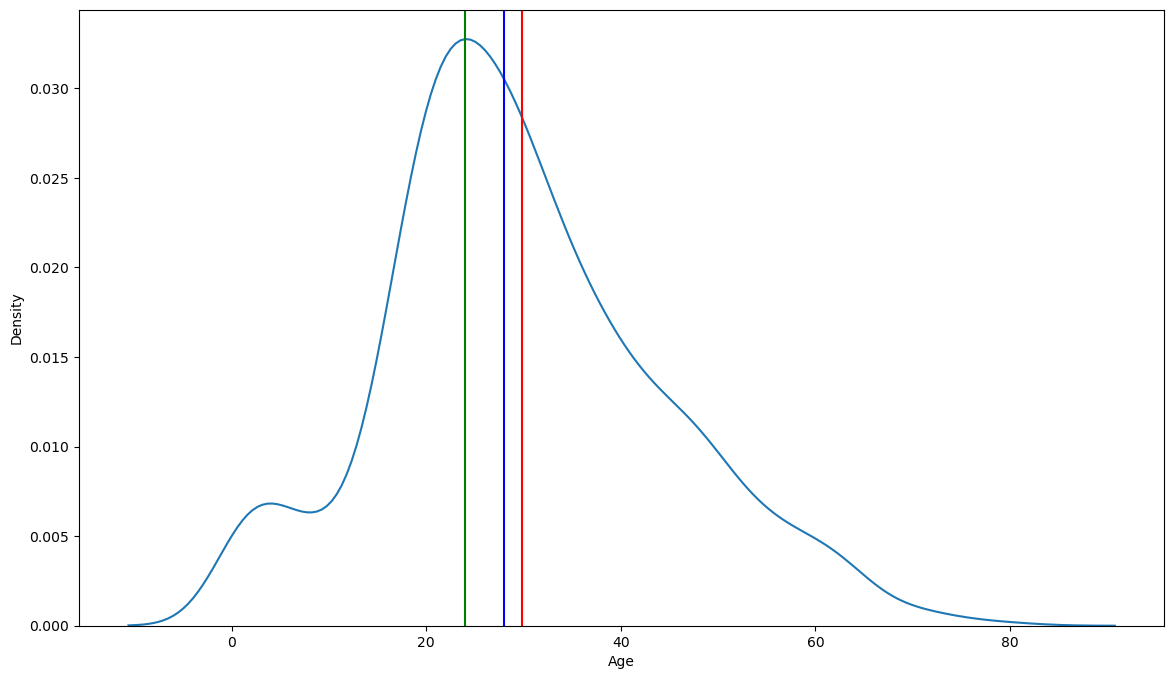

In [11]:
plt.figure(figsize=[14,8])
sns.kdeplot(df_titanic["Age"]);
plt.axvline(me,label="Mean",color="Red");
plt.axvline(md,label="Median",color="Blue");
plt.axvline(mo,label="Mode",color="green");


In [12]:
print("skewness is",df_titanic["Age"].skew())

skewness is 0.40767455974362266


In [13]:
print("kurtosis is",df_titanic["Age"].kurt())

kurtosis is 0.1469476357378139


In [14]:
df_titanic["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [15]:
# inference - looking at minimum age as kids(0.17%) ,

<Axes: >

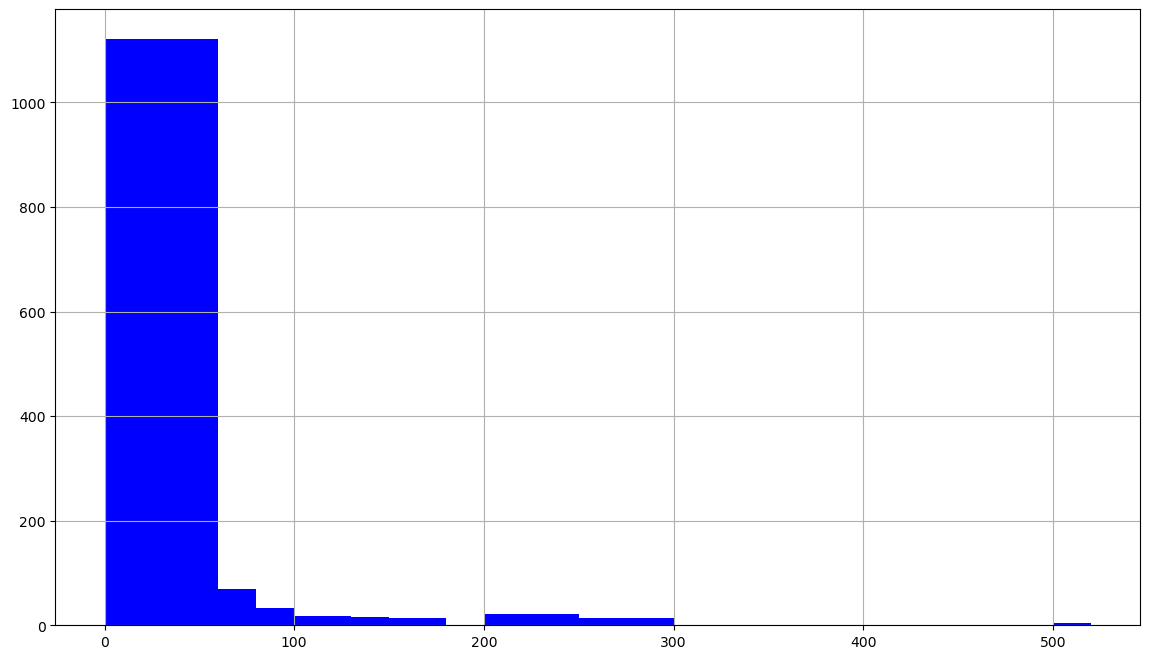

In [16]:
plt.figure(figsize=[14,8])
df_titanic["Fare"].hist(bins=[0,60,80,100,130,150,180,200,250,300,400,480,500,520],color="blue")

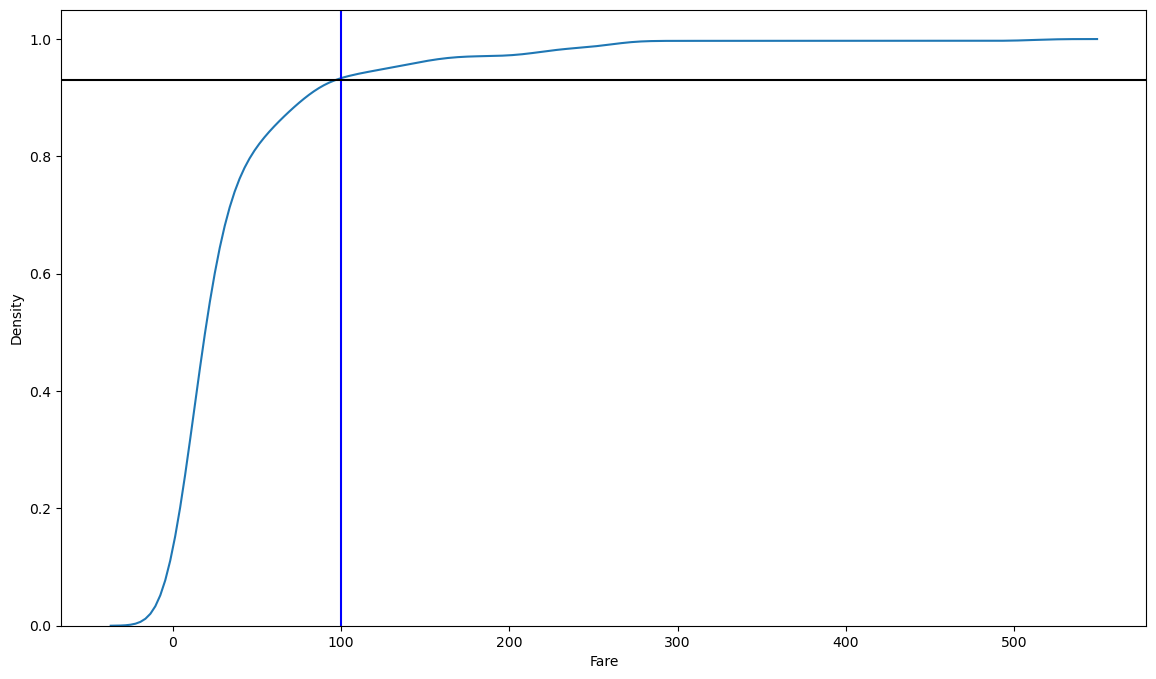

In [17]:
plt.figure(figsize=[14,8])
sns.kdeplot(df_titanic["Fare"] , cumulative= True);
plt.axvline(100,color="blue");
plt.axhline(0.93,color="black");
plt.show()

In [18]:
df_titanic["Fare"][df_titanic["Fare"]==0].count()

17

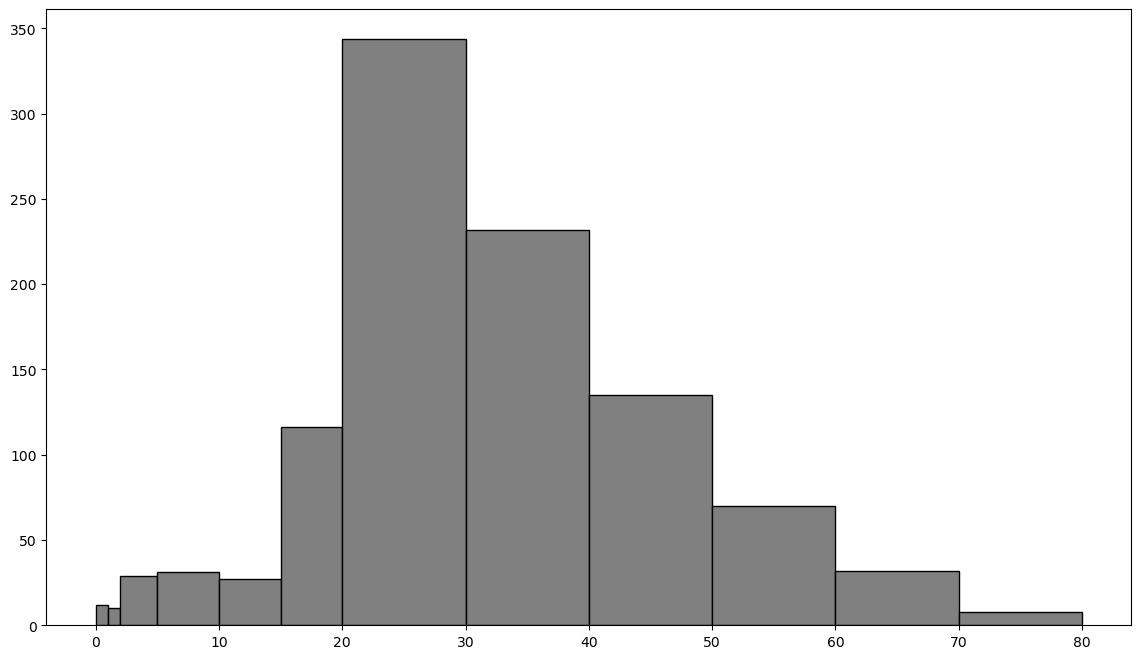

In [19]:
plt.figure(figsize=[14,8])
plt.hist(x="Age",data=df_titanic,bins=[0,1,2,5,10,15,20,30,40,50,60,70,80],
        color="grey",
        edgecolor="black")
plt.show()

In [20]:
num_cols=df_titanic.select_dtypes(include=np.number)
num_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
num_cols=num_cols[["Age","Fare"]]

In [22]:
plt.rcParams["figure.figsize"]=5,5

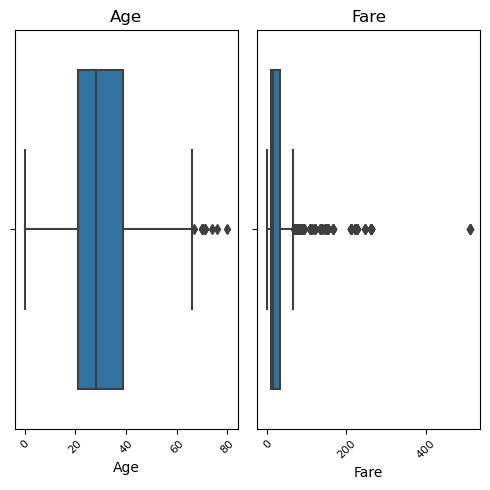

In [23]:
j=1
for i in num_cols:
    plt.subplot(1,2,j)
    sns.boxplot(x=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1
    plt.xticks(rotation=45,fontsize=8)
    
plt.tight_layout()
plt.show()

In [24]:
cols=["Embarked","Survived","Sex"]

In [25]:
for i in cols:
    df_titanic[i].astype(object)

In [26]:
df_titanic["Survived"]=df_titanic["Survived"].astype("object")

In [27]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


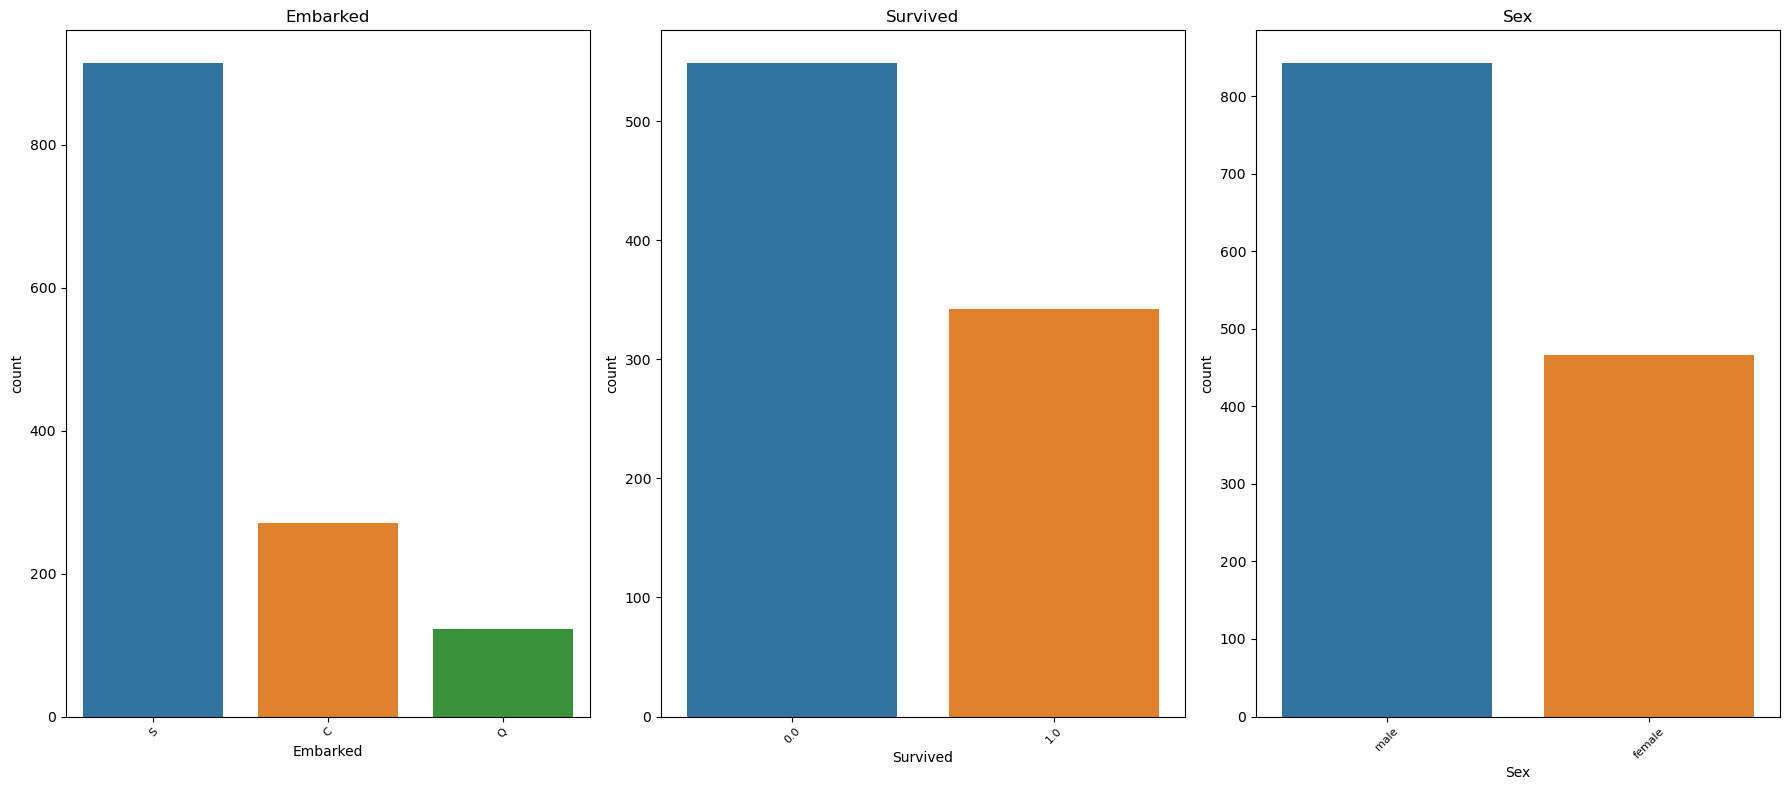

In [28]:
plt.figure(figsize=[18,8])
j=1
for i in cols:
    plt.subplot(1,3,j)
    sns.countplot(x=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1
    plt.xticks(rotation=45,fontsize=8)
    
plt.tight_layout()
plt.show()

In [29]:
df_titanic["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [30]:
df_titanic[df_titanic["Embarked"]=="S"]["Embarked"].value_counts()

Embarked
S    914
Name: count, dtype: int64

## BIVARIANT ANALYSIS (num vs cat)

In [31]:
num_cols

Age      Fare
0     22.0    7.2500
1     38.0   71.2833
2     26.0    7.9250
3     35.0   53.1000
4     35.0    8.0500
...    ...       ...
1304   NaN    8.0500
1305  39.0  108.9000
1306  38.5    7.2500
1307   NaN    8.0500
1308   NaN   22.3583

[1309 rows x 2 columns]

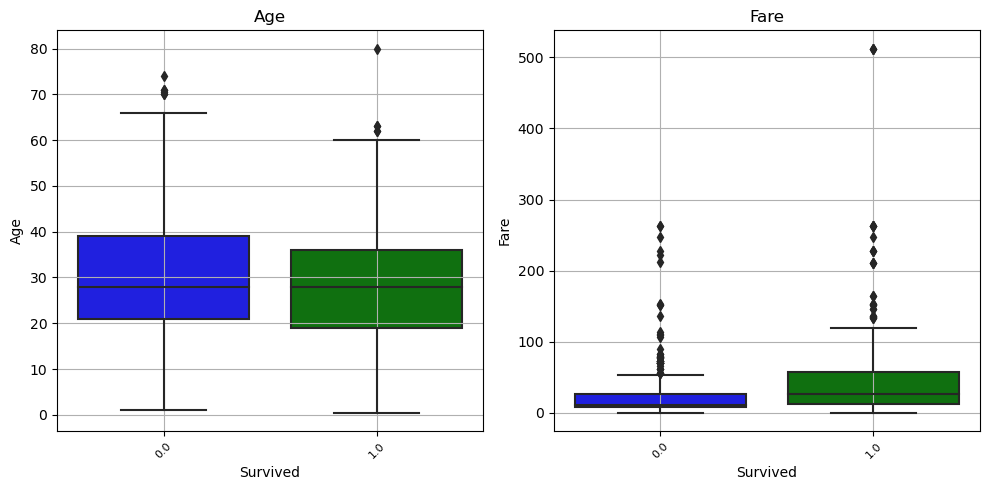

In [32]:
plt.figure(figsize=[10,5])
j=1
for i in num_cols:
    plt.subplot(1,2,j)
    sns.boxplot(x=df_titanic["Survived"] , y=df_titanic.loc[:,i],palette=["blue","Green"])
    plt.title(i)
    j=j+1
    plt.xticks(rotation=45,fontsize=8)
    plt.grid(True)
    
plt.tight_layout()
plt.show()


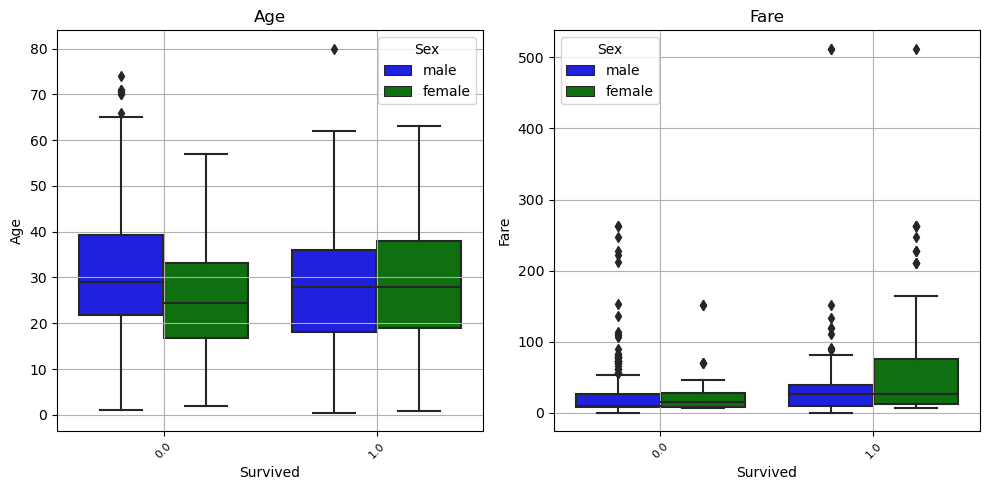

In [33]:
plt.figure(figsize=[10,5])
j=1
for i in num_cols:
    plt.subplot(1,2,j)
    sns.boxplot(x=df_titanic["Survived"] , y=df_titanic.loc[:,i],hue=df_titanic["Sex"],palette=["blue","Green"])
    plt.title(i)
    j=j+1
    plt.xticks(rotation=45,fontsize=8)
    plt.grid(True)
    
plt.tight_layout()
plt.show()


In [34]:
df_titanic.groupby("Survived")["Fare"].describe().T

Survived         0.0         1.0
count     549.000000  342.000000
mean       22.117887   48.395408
std        31.388207   66.596998
min         0.000000    0.000000
25%         7.854200   12.475000
50%        10.500000   26.000000
75%        26.000000   57.000000
max       263.000000  512.329200

In [35]:
df_titanic.groupby("Survived")["Age"].describe().T

Survived         0.0         1.0
count     424.000000  290.000000
mean       30.626179   28.343690
std        14.172110   14.950952
min         1.000000    0.420000
25%        21.000000   19.000000
50%        28.000000   28.000000
75%        39.000000   36.000000
max        74.000000   80.000000

In [36]:
df_titanic.groupby("Survived")["Pclass"].value_counts(normalize=True)*100

Survived  Pclass
0.0       3         67.759563
          2         17.668488
          1         14.571949
1.0       1         39.766082
          3         34.795322
          2         25.438596
Name: proportion, dtype: float64

In [37]:
df_titanic.groupby("Survived")[["Pclass","Sex"]].value_counts(normalize=True)*100

Survived  Pclass  Sex   
0.0       3       male      54.644809
          2       male      16.575592
          1       male      14.025501
          3       female    13.114754
          2       female     1.092896
          1       female     0.546448
1.0       1       female    26.608187
          3       female    21.052632
          2       female    20.467836
          3       male      13.742690
          1       male      13.157895
          2       male       4.970760
Name: proportion, dtype: float64

In [38]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Survived"])

Survived  0.0  1.0
Pclass            
1          80  136
2          97   87
3         372  119

<Figure size 1000x500 with 0 Axes>

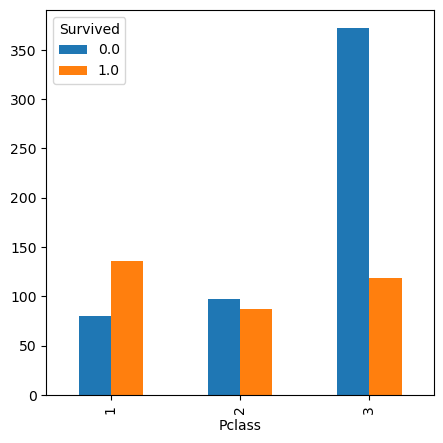

In [39]:
plt.figure(figsize=[10,5])
pd.crosstab( index= df_titanic["Pclass"],columns= df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [40]:
pd.crosstab( index= df_titanic["Embarked"],columns= df_titanic["Survived"])

Survived  0.0  1.0
Embarked          
C          75   93
Q          47   30
S         427  217

<Figure size 1000x500 with 0 Axes>

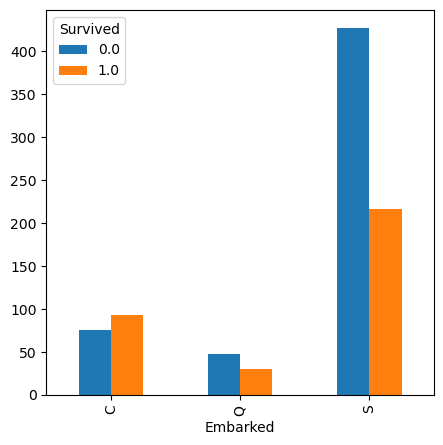

In [41]:
plt.figure(figsize=[10,5])
pd.crosstab( index= df_titanic["Embarked"],columns= df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [42]:
pd.crosstab( index= df_titanic["Sex"],columns= df_titanic["Survived"])

Survived  0.0  1.0
Sex               
female     81  233
male      468  109

<Figure size 1000x500 with 0 Axes>

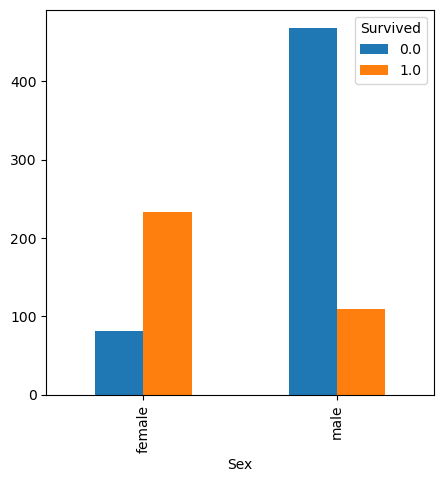

In [43]:
plt.figure(figsize=[10,5])
pd.crosstab( index= df_titanic["Sex"],columns= df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [44]:
import plotly.express as px

In [45]:
px.histogram(df_titanic,x="Age",color="Embarked")

## Categorical vs categorical

In [46]:
cats=["Embarked","Pclass","SibSp",'Parch',"Sex"]

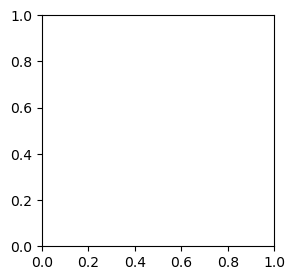

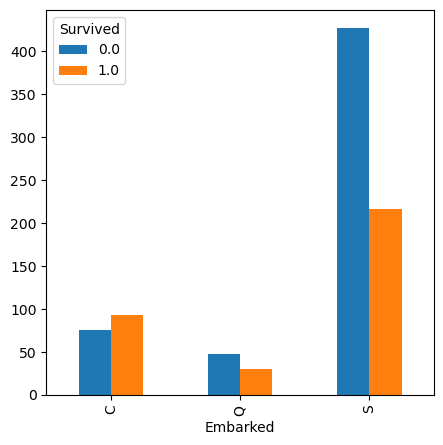

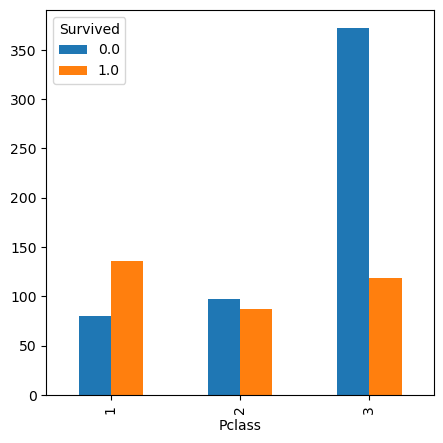

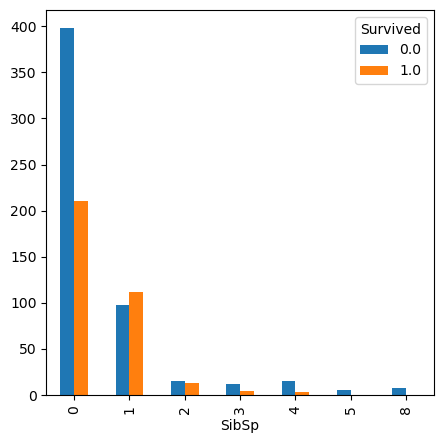

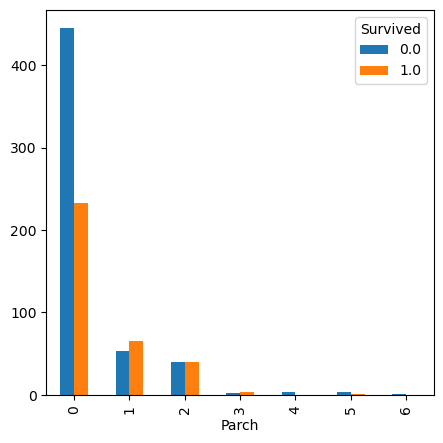

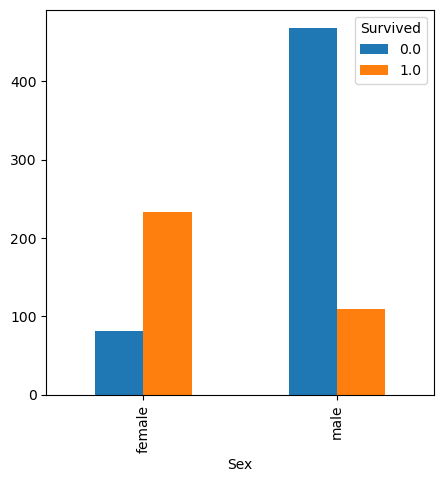

In [47]:
plt.subplots(figsize=[3,3])
for i in cats:
    pd.crosstab(df_titanic[i],df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [48]:
pd.crosstab(index=df_titanic["Embarked"],
           columns=df_titanic["Sex"],
           values=df_titanic["Fare"],
           aggfunc=['mean',"median"]).T

Embarked               C          Q          S
       Sex                                    
mean   female  81.128540  12.550837  39.339305
       male    48.810619  12.273941  21.841878
median female  57.750000   7.750000  23.000000
       male    21.679200   7.750000  10.500000

<Figure size 1000x500 with 0 Axes>

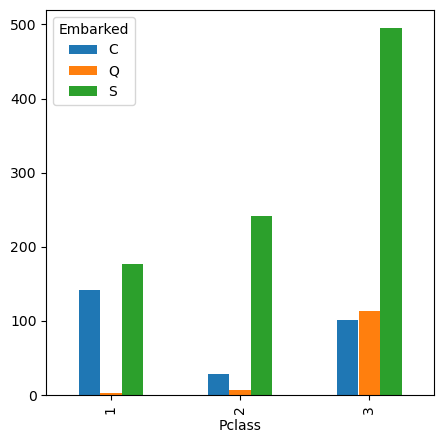

In [49]:
plt.figure(figsize=[10,5])
pd.crosstab( index= df_titanic["Pclass"],columns= df_titanic["Embarked"]).plot(kind="bar")
plt.show()

In [50]:
import sklearn
sklearn.__version__

'1.2.2'

### MULTIVARIANT Analysis

In [51]:
## Facet grid - is for 4 features , where 2 are numerical and 2 are categeriocal

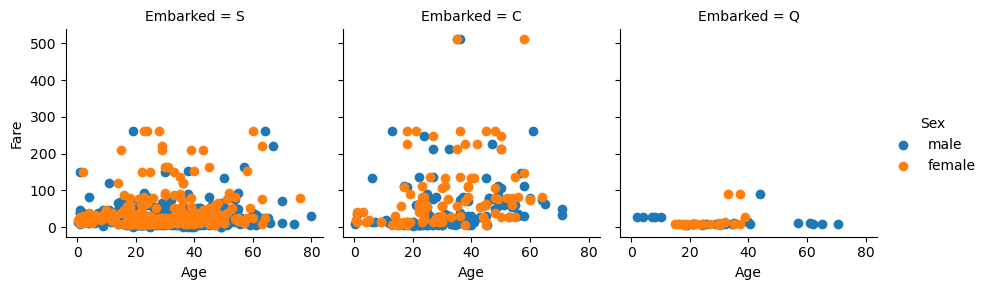

In [52]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Sex")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()


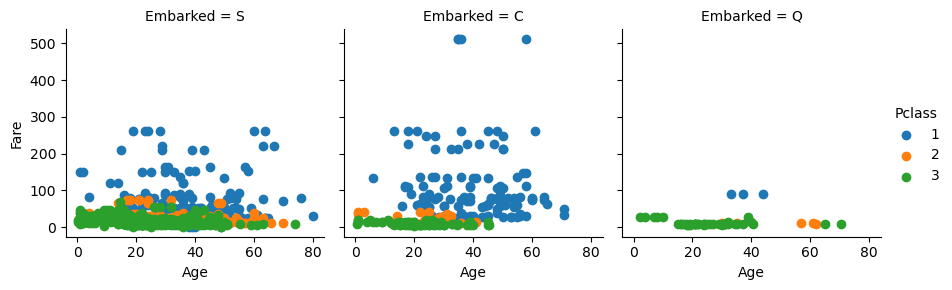

In [53]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Pclass")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()


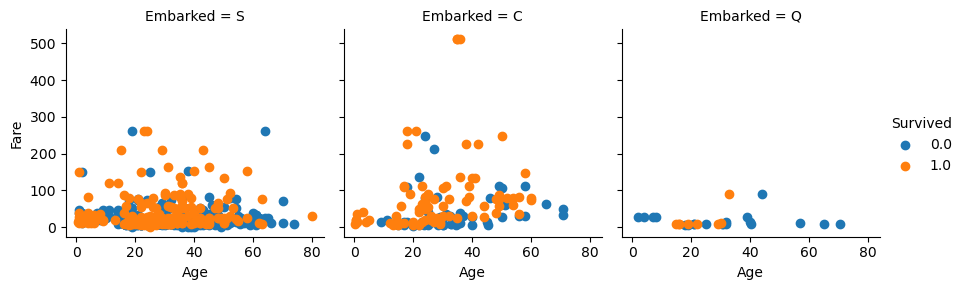

In [54]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

<Figure size 3000x1500 with 0 Axes>

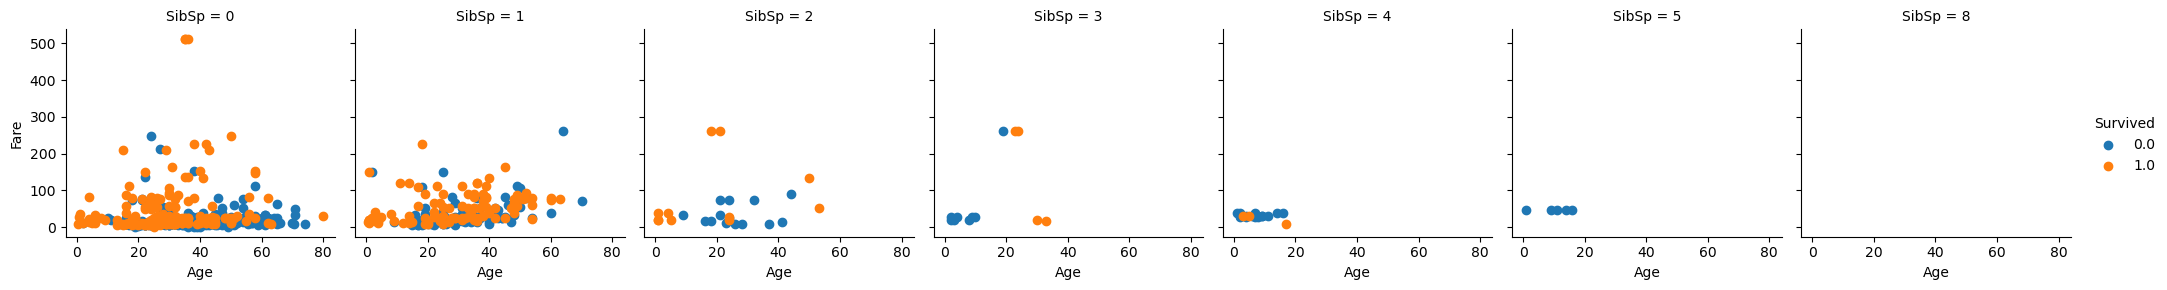

In [55]:
plt.figure(figsize=[30,15])
titanicplot=sns.FacetGrid(df_titanic,col="SibSp",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

<Figure size 3000x1500 with 0 Axes>

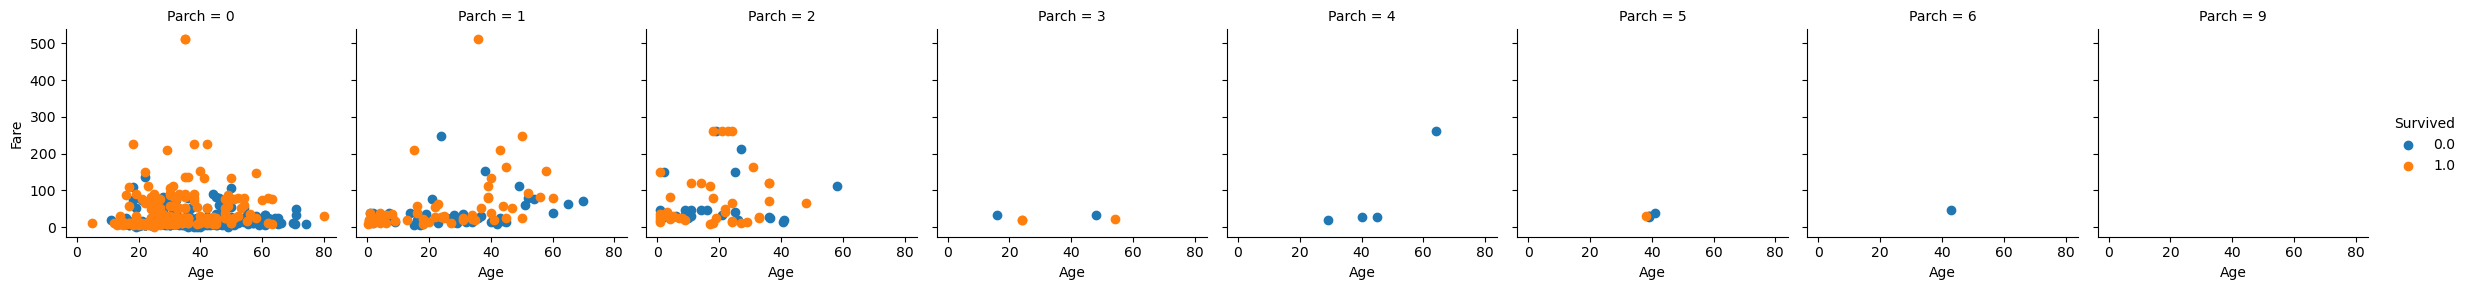

In [56]:
plt.figure(figsize=[30,15])
titanicplot=sns.FacetGrid(df_titanic,col="Parch",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

## Missing Values 

In [57]:
df_titanic.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [58]:
df_titanic.isnull().sum().sum()

1698

In [59]:
#3# the survived -418 are shown as missing values for survived as the test data doesnt contain the y or target variable


In [60]:
((df_titanic.isnull().sum()/df_titanic.index.size)*100).sort_values(ascending=False)

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

In [61]:
## we are gonna do feature enginnering on cabin/age/SibSp/ticket 
# why to do feature engineering?
#

In [62]:
#!pip install dtale

In [63]:
#import dtale
#dtale.show(df_titanic)


In [64]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [65]:
df_titanic.groupby("Sex")["Age"].describe()

count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  388.0  28.687088  14.576962  0.17  19.0  27.0  38.0  76.0
male    658.0  30.585228  14.280581  0.33  21.0  28.0  39.0  80.0

In [66]:
## we can impute the missing values in the age column by suing median of male age for male and female with their median 
# more productive way is to use KNN impute

In [67]:
from fancyimpute import KNN,IterativeImputer

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [70]:
num_cols.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [71]:
sc=StandardScaler()
df_num_sc=pd.DataFrame(sc.fit_transform(num_cols),columns=num_cols.columns)
df_num_sc.head()

Age      Fare
0 -0.547050 -0.503402
1  0.563552  0.734222
2 -0.269400 -0.490356
3  0.355314  0.382778
4  0.355314 -0.487940

In [72]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1046 non-null   float64
 1   Fare    1308 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


In [73]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)

df_num_sc["Age"]=imputer.fit_transform(pd.DataFrame(df_num_sc["Age"]))

df_num_sc["Fare"]=imputer.fit_transform(pd.DataFrame(df_num_sc["Fare"]))

In [74]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
 1   Fare    1309 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


In [75]:
## using inverse _transform on the scaled data
df_num =pd.DataFrame(sc.inverse_transform(df_num_sc),columns=df_num_sc.columns)
df_num.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [76]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
 1   Fare    1309 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


In [77]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 16 th may 2024

In [78]:
df_others=df_titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex','SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked']]


In [79]:
df_titanic=pd.concat([df_num,df_others],axis=1)

In [80]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          2
dtype: int64

In [81]:
from sklearn.impute import SimpleImputer

In [82]:
df_titanic["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [83]:
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df_titanic["Embarked"]=pd.DataFrame(imp.fit_transform(pd.DataFrame(df_titanic["Embarked"])))

In [84]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          0
dtype: int64

# Feature Engineering 

In [85]:
# finding patterns and creating new columns  associated with it ,to drop a columns with more missing values 
#.before droping we gonna work with patterns contributing by that column 

In [86]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
df_titanic.groupby("Pclass")["Cabin"].describe()

count unique          top freq
Pclass                               
1        256    168  C23 C25 C27    6
2         23      9          F33    4
3         16      9           G6    5

In [88]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Cabin"])

Cabin   A10  A11  A14  A16  A18  A19  A20  A21  A23  A24  A26  A29  A31  A32  \
Pclass                                                                         
1         1    1    1    1    1    1    1    1    1    1    1    1    1    1   
2         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

Cabin   A34  A36  A5  A6  A7  A9  B10  B101  B102  B11  B18  ...  E44  E45  \
Pclass                                                       ...             
1         3    1   1   1   1   1    1     1     1    1    2  ...    2    1   
2         0    0   0   0   0   0    0     0     0    0    0  ...    0    0   
3         0    0   0   0   0   0    0     0     0    0    0  ...    0    0   

Cabin   E46  E49  E50  E52  E58  E60  E63  E67  E68  E77  E8  F  F E46  F E57  \
Pclass                                                                          
1         2    1    2    1    1    1    1    2    1    0   2  0      0      0   
2         0    0    0    0    0    0    0    0    0    1   0  1      0      0   
3         0    0    0    0    0    0    0    0    0    0   0  0      1      1   

Cabin   F E69  F G63  F G73  F2  F33  F38  F4  G6  T  
Pclass                                                
1           0      0      0   0    0    0   0   0  1  
2           0      0      0   4    4    0   4   0  0  
3           1      2      2   0    0    1   0   5  0  

[3 rows x 186 columns]

In [89]:
## in feature engineering we need to go with patterns and their posiabilities 

In [90]:
pd.set_option("display.max_columns",150)

In [91]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Cabin"])

Cabin   A10  A11  A14  A16  A18  A19  A20  A21  A23  A24  A26  A29  A31  A32  \
Pclass                                                                         
1         1    1    1    1    1    1    1    1    1    1    1    1    1    1   
2         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

Cabin   A34  A36  A5  A6  A7  A9  B10  B101  B102  B11  B18  B19  B20  B22  \
Pclass                                                                       
1         3    1   1   1   1   1    1     1     1    1    2    1    2    2   
2         0    0   0   0   0   0    0     0     0    0    0    0    0    0   
3         0    0   0   0   0   0    0     0     0    0    0    0    0    0   

Cabin   B24  B26  B28  B3  B30  B35  B36  B37  B38  B39  B4  B41  B42  B45  \
Pclass                                                                       
1         1    1    2   1    1    2    1    1    1    1   1    2    1    2   
2         0    0    0   0    0    0    0    0    0    0   0    0    0    0   
3         0    0    0   0    0    0    0    0    0    0   0    0    0    0   

Cabin   B49  B5  B50  B51 B53 B55  B52 B54 B56  B57 B59 B63 B66  B58 B60  B61  \
Pclass                                                                          
1         2   2    1            3            1                5        3    1   
2         0   0    0            0            0                0        0    0   
3         0   0    0            0            0                0        0    0   

Cabin   B69  B71  B73  B77  B78  B79  B80  B82 B84  B86  B94  B96 B98  C101  \
Pclass                                                                        
1         2    2    1    2    2    1    1        1    1    1        4     3   
2         0    0    0    0    0    0    0        0    0    0        0     0   
3         0    0    0    0    0    0    0        0    0    0        0     0   

Cabin   C103  C104  C105  C106  C110  C111  C116  C118  C123  C124  C125  \
Pclass                                                                     
1          1     1     1     2     1     1     2     1     2     2     2   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   

Cabin   C126  C128  ...  C91  C92  C93  C95  C97  C99  D  D10 D12  D11  D15  \
Pclass              ...                                                       
1          2     1  ...    1    2    2    1    1    1  0        2    1    2   
2          0     0  ...    0    0    0    0    0    0  4        0    0    0   
3          0     0  ...    0    0    0    0    0    0  0        0    0    0   

Cabin   D17  D19  D20  D21  D22  D26  D28  D30  D33  D34  D35  D36  D37  D38  \
Pclass                                                                         
1         2    2    2    2    1    2    2    2    2    1    2    2    2    0   
2         0    0    0    0    0    0    0    0    0    0    0    0    0    1   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

Cabin   D40  D43  D45  D46  D47  D48  D49  D50  D56  D6  D7  D9  E10  E101  \
Pclass                                                                       
1         1    1    1    1    1    1    1    1    0   1   1   1    0     0   
2         0    0    0    0    0    0    0    0    1   0   0   0    0     3   
3         0    0    0    0    0    0    0    0    0   0   0   0    1     0   

Cabin   E12  E121  E17  E24  E25  E31  E33  E34  E36  E38  E39 E41  E40  E44  \
Pclass                                                                         
1         1     0    1    2    2    2    2    3    1    1        1    1    2   
2         0     0    0    0    0    0    0    0    0    0        0    0    0   
3         0     2    0    0    0    0    0    0    0    0        0    0    0   

Cabin   E45  E46  E49  E50  E52  E58  E60  E6

In [92]:
df_titanic.drop("Cabin",axis=1,inplace=True)

In [93]:
df_titanic.groupby("Pclass")['Ticket'].describe()

count unique           top freq
Pclass                                
1        323    188      PC 17608    7
2        277    192  S.O.C. 14879    7
3        709    549      CA. 2343   11

In [94]:
df_g1=df_titanic.groupby("Pclass")
df_g1.get_group(1).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  323.000000  323.000000    323.00000   323.0  323.000000  323.000000
mean    38.039580   87.508992    672.49226     1.0    0.436533    0.365325
std     13.970676   80.447178    368.72570     0.0    0.609064    0.715602
min      0.920000    0.000000      2.00000     1.0    0.000000    0.000000
25%     29.881138   30.695800    347.00000     1.0    0.000000    0.000000
50%     36.000000   60.000000    670.00000     1.0    0.000000    0.000000
75%     48.000000  107.662500    973.50000     1.0    1.000000    0.500000
max     80.000000  512.329200   1306.00000     1.0    3.000000    4.000000

In [95]:
df_g1.get_group(2).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  277.000000  277.000000   277.000000   277.0  277.000000  277.000000
mean    29.528333   21.179196   671.566787     2.0    0.393502    0.368231
std     13.237693   13.607122   383.707495     0.0    0.590100    0.692717
min      0.670000    0.000000    10.000000     2.0    0.000000    0.000000
25%     23.000000   13.000000   341.000000     2.0    0.000000    0.000000
50%     29.000000   15.045800   671.000000     2.0    0.000000    0.000000
75%     36.000000   26.000000  1035.000000     2.0    1.000000    1.000000
max     70.000000   73.500000  1298.000000     2.0    3.000000    3.000000

In [96]:
df_g1.get_group(3).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  709.000000  709.000000   709.000000   709.0  709.000000  709.000000
mean    26.302224   13.331087   640.558533     3.0    0.568406    0.400564
std     10.310818   11.510752   379.887782     0.0    1.299681    0.981639
min      0.170000    0.000000     1.000000     3.0    0.000000    0.000000
25%     21.000000    7.750000   302.000000     3.0    0.000000    0.000000
50%     29.881138    8.050000   644.000000     3.0    0.000000    0.000000
75%     29.881138   15.245800   971.000000     3.0    1.000000    0.000000
max     74.000000   69.550000  1309.000000     3.0    8.000000    9.000000

In [97]:
df_g1.get_group(1)

Age      Fare  PassengerId Survived  Pclass  \
1     38.0   71.2833            2      1.0       1   
3     35.0   53.1000            4      1.0       1   
6     54.0   51.8625            7      0.0       1   
11    58.0   26.5500           12      1.0       1   
23    28.0   35.5000           24      1.0       1   
...    ...       ...          ...      ...     ...   
1294  17.0   47.1000         1295      NaN       1   
1295  43.0   27.7208         1296      NaN       1   
1298  50.0  211.5000         1299      NaN       1   
1302  37.0   90.0000         1303      NaN       1   
1305  39.0  108.9000         1306      NaN       1   

                                                   Name     Sex  SibSp  Parch  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
6                               McCarthy, Mr. Timothy J    male      0      0   
11                             Bonnell, Miss. Elizabeth  female      0      0   
23                         Sloper, Mr. William Thompson    male      0      0   
...                                                 ...     ...    ...    ...   
1294                             Carrau, Mr. Jose Pedro    male      0      0   
1295                       Frauenthal, Mr. Isaac Gerald    male      1      0   
1298                         Widener, Mr. George Dunton    male      1      1   
1302    Minahan, Mrs. William Edward (Lillian E Thorpe)  female      1      0   
1305                       Oliva y Ocana, Dona. Fermina  female      0      0   

        Ticket Embarked  
1     PC 17599        C  
3       113803        S  
6        17463        S  
11      113783        S  
23      113788        S  
...        ...      ...  
1294    113059        S  
1295     17765        C  
1298    113503        C  
1302     19928        Q  
1305  PC 17758        C  

[323 rows x 11 columns]

In [98]:
df_g1.get_group(2)

Age     Fare  PassengerId Survived  Pclass  \
9     14.000000  30.0708           10      1.0       2   
15    55.000000  16.0000           16      1.0       2   
17    29.881138  13.0000           18      1.0       2   
20    35.000000  26.0000           21      0.0       2   
21    34.000000  13.0000           22      1.0       2   
...         ...      ...          ...      ...     ...   
1278  57.000000  13.0000         1279      NaN       2   
1284  47.000000  10.5000         1285      NaN       2   
1292  38.000000  21.0000         1293      NaN       2   
1296  20.000000  13.8625         1297      NaN       2   
1297  23.000000  10.5000         1298      NaN       2   

                                              Name     Sex  SibSp  Parch  \
9              Nasser, Mrs. Nicholas (Adele Achem)  female      1      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female      0      0   
17                    Williams, Mr. Charles Eugene    male      0      0   
20                            Fynney, Mr. Joseph J    male      0      0   
21                           Beesley, Mr. Lawrence    male      0      0   
...                                            ...     ...    ...    ...   
1278                               Ashby, Mr. John    male      0      0   
1284                          Gilbert, Mr. William    male      0      0   
1292                               Gale, Mr. Harry    male      1      0   
1296  Nourney, Mr. Alfred (Baron von Drachstedt")"    male      0      0   
1297                     Ware, Mr. William Jeffery    male      1      0   

             Ticket Embarked  
9            237736        C  
15           248706        S  
17           244373        S  
20           239865        S  
21           248698        S  
...             ...      ...  
1278         244346        S  
1284     C.A. 30769        S  
1292          28664        S  
1296  SC/PARIS 2166        C  
1297          28666        S  

[277 rows x 11 columns]

In [99]:
df_pclass_3=df_g1.get_group(3)
df_pclass_3

Age     Fare  PassengerId Survived  Pclass  \
0     22.000000   7.2500            1      0.0       3   
2     26.000000   7.9250            3      1.0       3   
4     35.000000   8.0500            5      0.0       3   
5     29.881138   8.4583            6      0.0       3   
7      2.000000  21.0750            8      0.0       3   
...         ...      ...          ...      ...     ...   
1303  28.000000   7.7750         1304      NaN       3   
1304  29.881138   8.0500         1305      NaN       3   
1306  38.500000   7.2500         1307      NaN       3   
1307  29.881138   8.0500         1308      NaN       3   
1308  29.881138  22.3583         1309      NaN       3   

                                Name     Sex  SibSp  Parch  \
0            Braund, Mr. Owen Harris    male      1      0   
2             Heikkinen, Miss. Laina  female      0      0   
4           Allen, Mr. William Henry    male      0      0   
5                   Moran, Mr. James    male      0      0   
7     Palsson, Master. Gosta Leonard    male      3      1   
...                              ...     ...    ...    ...   
1303  Henriksson, Miss. Jenny Lovisa  female      0      0   
1304              Spector, Mr. Woolf    male      0      0   
1306    Saether, Mr. Simon Sivertsen    male      0      0   
1307             Ware, Mr. Frederick    male      0      0   
1308        Peter, Master. Michael J    male      1      1   

                  Ticket Embarked  
0              A/5 21171        S  
2       STON/O2. 3101282        S  
4                 373450        S  
5                 330877        Q  
7                 349909        S  
...                  ...      ...  
1303              347086        S  
1304           A.5. 3236        S  
1306  SOTON/O.Q. 3101262        S  
1307              359309        S  
1308                2668        C  

[709 rows x 11 columns]

In [100]:
df_pclass_3["Ticket"]

0                A/5 21171
2         STON/O2. 3101282
4                   373450
5                   330877
7                   349909
               ...        
1303                347086
1304             A.5. 3236
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 709, dtype: object

In [101]:
## inference: not much pattern is seen

In [102]:
df_titanic["Age"].value_counts

<bound method IndexOpsMixin.value_counts of 0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.881138
1305    39.000000
1306    38.500000
1307    29.881138
1308    29.881138
Name: Age, Length: 1309, dtype: float64>

### Age - Feature Selection

In [103]:
bins=[0,15,20,35,55,85]
labels=["Young",'Teenager',"Adult-young","Adults-Middle","Adults-Old"]
df_titanic["Age Group"]=pd.cut(df_titanic["Age"],bins=bins,labels=labels,include_lowest=True)
df_titanic.head()

Age     Fare  PassengerId Survived  Pclass  \
0  22.0   7.2500            1      0.0       3   
1  38.0  71.2833            2      1.0       1   
2  26.0   7.9250            3      1.0       3   
3  35.0  53.1000            4      1.0       1   
4  35.0   8.0500            5      0.0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket Embarked      Age Group  
0         A/5 21171        S    Adult-young  
1          PC 17599        C  Adults-Middle  
2  STON/O2. 3101282        S    Adult-young  
3            113803        S    Adult-young  
4            373450        S    Adult-young

In [104]:
## Facet Grid 

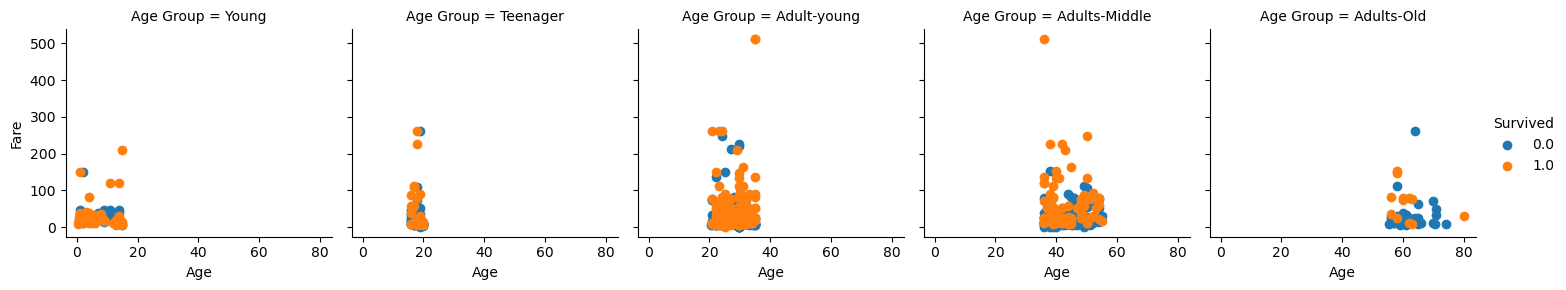

In [105]:
titanicplot=sns.FacetGrid(df_titanic,col="Age Group",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

# Automated EDA  - PANDAS PROFILING

In [106]:
# !pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/33/85/45027914eb485482976883dcaab434eab99f1ed5cb222781e7ba46bdf3b7/ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/ed/76/9a17032880ed27f2dbd490c77a3431cbc80f47ba81534131de3c2846e736/pydantic-2.7.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/107.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/107.3 kB ? eta -:--:--
     -------------- ---------------------- 41.0/107.3 kB 393.8 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/107.3 kB 655.4 kB/s eta 0:00:01
     ------------------------------------ 107.3/107.3 kB 693.4 kB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/pa

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.


In [107]:
from ydata_profiling import ProfileReport

In [108]:
profile=ProfileReport(df_titanic)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [110]:
df_titanic.to_csv('titanic_viz.csv')

In [120]:
df_titanicNew = df_titanic.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [121]:
df_train=df_titanicNew.iloc[0:train.shape[0],]
df_train.shape

(891, 9)

In [123]:
df_train.head()

Age     Fare Survived  Pclass     Sex  SibSp  Parch Embarked  \
0  22.0   7.2500      0.0       3    male      1      0        S   
1  38.0  71.2833      1.0       1  female      1      0        C   
2  26.0   7.9250      1.0       3  female      0      0        S   
3  35.0  53.1000      1.0       1  female      1      0        S   
4  35.0   8.0500      0.0       3    male      0      0        S   

       Age Group  
0    Adult-young  
1  Adults-Middle  
2    Adult-young  
3    Adult-young  
4    Adult-young

In [122]:
df_test=df_titanicNew.iloc[train.shape[0]:,]
df_test.shape

(418, 9)

In [124]:
df_test.head()

Age     Fare Survived  Pclass     Sex  SibSp  Parch Embarked  \
891  34.5   7.8292      NaN       3    male      0      0        Q   
892  47.0   7.0000      NaN       3  female      1      0        S   
893  62.0   9.6875      NaN       2    male      0      0        Q   
894  27.0   8.6625      NaN       3    male      0      0        S   
895  22.0  12.2875      NaN       3  female      1      1        S   

         Age Group  
891    Adult-young  
892  Adults-Middle  
893     Adults-Old  
894    Adult-young  
895    Adult-young

In [125]:
df_test.drop(columns= 'Survived' , inplace= True)

In [126]:
df_test.shape

(418, 8)

# chi Square Test

In [129]:
from scipy.stats import chi2_contingency

h0 = 'there is no association between our selected column and target variable'
h1 = 'there association between our selected column and target variable'

In [131]:
chi_test = ['Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked' , 'Age Group']

for i in chi_test:
    teststats , pvalue , dof , expected_freq = chi2_contingency(pd.crosstab(df_train[i] , df_train['Survived']))
    
    print(f'pvalue for column {i} is {pvalue} {h1 if pvalue > 0.05 else h0}')

pvalue for column Pclass is 4.549251711298793e-23 there is no association between our selected column and target variable
pvalue for column Sex is 1.1973570627755645e-58 there is no association between our selected column and target variable
pvalue for column SibSp is 1.5585810465902147e-06 there is no association between our selected column and target variable
pvalue for column Parch is 9.703526421039997e-05 there is no association between our selected column and target variable
pvalue for column Embarked is 2.3008626481449577e-06 there is no association between our selected column and target variable
pvalue for column Age Group is 0.0009955378235861937 there is no association between our selected column and target variable


In [133]:
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

In [136]:
df_train['Survived'] = df_train['Survived'].astype(int)

In [137]:
X = df_train.drop(columns= 'Survived')
y = df_train['Survived']

In [138]:
X.head()

Age     Fare  Pclass     Sex  SibSp  Parch Embarked      Age Group
0  22.0   7.2500       3    male      1      0        S    Adult-young
1  38.0  71.2833       1  female      1      0        C  Adults-Middle
2  26.0   7.9250       3  female      0      0        S    Adult-young
3  35.0  53.1000       1  female      1      0        S    Adult-young
4  35.0   8.0500       3    male      0      0        S    Adult-young

In [139]:
num_data = ['Age' , 'Fare']

cat_data = chi_test

In [140]:
sc = StandardScaler()
num_scaled = sc.fit_transform(X[num_data])
num_scaled = pd.DataFrame(num_scaled , columns= num_data)

In [141]:
cat_dummy = pd.get_dummies(X[cat_data] , drop_first= True , dtype= int)
cat_dummy.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Age Group_Teenager  \
0       3      1      0         1           0           1                   0   
1       1      1      0         0           0           0                   0   
2       3      0      0         0           0           1                   0   
3       1      1      0         0           0           1                   0   
4       3      0      0         1           0           1                   0   

   Age Group_Adult-young  Age Group_Adults-Middle  Age Group_Adults-Old  
0                      1                        0                     0  
1                      0                        1                     0  
2                      1                        0                     0  
3                      1                        0                     0  
4                      1                        0                     0

In [142]:
x_scaled = pd.concat([num_scaled , cat_dummy] , axis= 1)
x_scaled

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  \
0   -0.595254 -0.502445       3      1      0         1           0   
1    0.635996  0.786845       1      1      0         0           0   
2   -0.287441 -0.488854       3      0      0         0           0   
3    0.405137  0.420730       1      1      0         0           0   
4    0.405137 -0.486337       3      0      0         1           0   
..        ...       ...     ...    ...    ...       ...         ...   
886 -0.210488 -0.386671       2      0      0         1           0   
887 -0.826113 -0.044381       1      0      0         0           0   
888  0.011224 -0.176263       3      1      2         0           0   
889 -0.287441 -0.044381       1      0      0         1           0   
890  0.174278 -0.492378       3      0      0         1           1   

     Embarked_S  Age Group_Teenager  Age Group_Adult-young  \
0             1                   0                      1   
1             0                   0                      0   
2             1                   0                      1   
3             1                   0                      1   
4             1                   0                      1   
..          ...                 ...                    ...   
886           1                   0                      1   
887           1                   1                      0   
888           1                   0                      1   
889           0                   0                      1   
890           0                   0                      1   

     Age Group_Adults-Middle  Age Group_Adults-Old  
0                          0                     0  
1                          1                     0  
2                          0                     0  
3                          0                     0  
4                          0                     0  
..                       ...                   ...  
886                        0                     0  
887                        0                     0  
888                        0                     0  
889                        0                     0  
890                        0                     0  

[891 rows x 12 columns]

In [143]:
num_data_test = ['Age' , 'Fare']

cat_data_test = chi_test

In [144]:
sc = StandardScaler()
num_scaled_test = sc.fit_transform(df_test[num_data_test])
num_scaled_test = pd.DataFrame(num_scaled_test , columns= num_data_test)

In [145]:
cat_dummy_test = pd.get_dummies(df_test[cat_data_test] , drop_first= True , dtype= int)
cat_dummy_test.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
891       3      0      0         1           1           0   
892       3      1      0         0           0           1   
893       2      0      0         1           1           0   
894       3      0      0         1           0           1   
895       3      1      1         0           0           1   

     Age Group_Teenager  Age Group_Adult-young  Age Group_Adults-Middle  \
891                   0                      1                        0   
892                   0                      0                        1   
893                   0                      0                        0   
894                   0                      1                        0   
895                   0                      1                        0   

     Age Group_Adults-Old  
891                     0  
892                     0  
893                     1  
894                     0  
895                     0

In [146]:
cat_dummy_test.reset_index(drop= True , inplace= True)

In [147]:
cat_dummy_test

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0         3      0      0         1           1           0   
1         3      1      0         0           0           1   
2         2      0      0         1           1           0   
3         3      0      0         1           0           1   
4         3      1      1         0           0           1   
..      ...    ...    ...       ...         ...         ...   
413       3      0      0         1           0           1   
414       1      0      0         0           0           0   
415       3      0      0         1           0           1   
416       3      0      0         1           0           1   
417       3      1      1         1           0           0   

     Age Group_Teenager  Age Group_Adult-young  Age Group_Adults-Middle  \
0                     0                      1                        0   
1                     0                      0                        1   
2                     0                      0                        0   
3                     0                      1                        0   
4                     0                      1                        0   
..                  ...                    ...                      ...   
413                   0                      1                        0   
414                   0                      0                        1   
415                   0                      0                        1   
416                   0                      1                        0   
417                   0                      1                        0   

     Age Group_Adults-Old  
0                       0  
1                       0  
2                       1  
3                       0  
4                       0  
..                    ...  
413                     0  
414                     0  
415                     0  
416                     0  
417                     0  

[418 rows x 10 columns]

In [148]:
df_test_scaled = pd.concat([num_scaled_test , cat_dummy_test] , axis= 1)
df_test_scaled

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  \
0    0.341348 -0.498306       3      0      0         1           1   
1    1.331807 -0.513173       3      1      0         0           0   
2    2.520359 -0.464987       2      0      0         1           1   
3   -0.252928 -0.483365       3      0      0         1           0   
4   -0.649112 -0.418371       3      1      1         0           0   
..        ...       ...     ...    ...    ...       ...         ...   
413 -0.024636 -0.494347       3      0      0         1           0   
414  0.697913  1.313850       1      0      0         0           0   
415  0.658295 -0.508691       3      0      0         1           0   
416 -0.024636 -0.494347       3      0      0         1           0   
417 -0.024636 -0.237805       3      1      1         1           0   

     Embarked_S  Age Group_Teenager  Age Group_Adult-young  \
0             0                   0                      1   
1             1                   0                      0   
2             0                   0                      0   
3             1                   0                      1   
4             1                   0                      1   
..          ...                 ...                    ...   
413           1                   0                      1   
414           0                   0                      0   
415           1                   0                      0   
416           1                   0                      1   
417           0                   0                      1   

     Age Group_Adults-Middle  Age Group_Adults-Old  
0                          0                     0  
1                          1                     0  
2                          0                     1  
3                          0                     0  
4                          0                     0  
..                       ...                   ...  
413                        0                     0  
414                        1                     0  
415                        1                     0  
416                        0                     0  
417                        0                     0  

[418 rows x 12 columns]

In [156]:
X = pd.get_dummies(X , columns= ['Sex' , 'Age Group', 'Embarked'] , drop_first= True , dtype= int)

In [157]:
X

Age     Fare  Pclass  SibSp  Parch  Sex_male  Age Group_Teenager  \
0    22.000000   7.2500       3      1      0         1                   0   
1    38.000000  71.2833       1      1      0         0                   0   
2    26.000000   7.9250       3      0      0         0                   0   
3    35.000000  53.1000       1      1      0         0                   0   
4    35.000000   8.0500       3      0      0         1                   0   
..         ...      ...     ...    ...    ...       ...                 ...   
886  27.000000  13.0000       2      0      0         1                   0   
887  19.000000  30.0000       1      0      0         0                   1   
888  29.881138  23.4500       3      1      2         0                   0   
889  26.000000  30.0000       1      0      0         1                   0   
890  32.000000   7.7500       3      0      0         1                   0   

     Age Group_Adult-young  Age Group_Adults-Middle  Age Group_Adults-Old  \
0                        1                        0                     0   
1                        0                        1                     0   
2                        1                        0                     0   
3                        1                        0                     0   
4                        1                        0                     0   
..                     ...                      ...                   ...   
886                      1                        0                     0   
887                      0                        0                     0   
888                      1                        0                     0   
889                      1                        0                     0   
890                      1                        0                     0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 12 columns]

In [153]:
df_test = pd.get_dummies(df_test , columns= ['Sex' , 'Age Group', 'Embarked'] , drop_first= True , dtype= int)

In [158]:
df_test

Age      Fare  Pclass  SibSp  Parch  Sex_male  Age Group_Teenager  \
891   34.500000    7.8292       3      0      0         1                   0   
892   47.000000    7.0000       3      1      0         0                   0   
893   62.000000    9.6875       2      0      0         1                   0   
894   27.000000    8.6625       3      0      0         1                   0   
895   22.000000   12.2875       3      1      1         0                   0   
...         ...       ...     ...    ...    ...       ...                 ...   
1304  29.881138    8.0500       3      0      0         1                   0   
1305  39.000000  108.9000       1      0      0         0                   0   
1306  38.500000    7.2500       3      0      0         1                   0   
1307  29.881138    8.0500       3      0      0         1                   0   
1308  29.881138   22.3583       3      1      1         1                   0   

      Age Group_Adult-young  Age Group_Adults-Middle  Age Group_Adults-Old  \
891                       1                        0                     0   
892                       0                        1                     0   
893                       0                        0                     1   
894                       1                        0                     0   
895                       1                        0                     0   
...                     ...                      ...                   ...   
1304                      1                        0                     0   
1305                      0                        1                     0   
1306                      0                        1                     0   
1307                      1                        0                     0   
1308                      1                        0                     0   

      Embarked_Q  Embarked_S  
891            1           0  
892            0           1  
893            1           0  
894            0           1  
895            0           1  
...          ...         ...  
1304           0           1  
1305           0           0  
1306           0           1  
1307           0           1  
1308           0           0  

[418 rows x 12 columns]

In [162]:
Kfold = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 0)

# Basic Model

In [160]:
lgr = LogisticRegression()

In [163]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    lgr.fit(x_train, y_train)
    y_pred.append(lgr.predict(df_test))

In [164]:
y_pred

[array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [165]:
y_log = pd.DataFrame(y_pred).T.mode(axis = 1)
y_log

0
0    0
1    0
2    0
3    0
4    1
..  ..
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]

In [167]:
model_prediction = pd.DataFrame({'PassengerID' : test.PassengerId, 'Survived' : test.Sex})
model_prediction

PassengerID Survived
0            892     male
1            893   female
2            894     male
3            895     male
4            896   female
..           ...      ...
413         1305     male
414         1306   female
415         1307     male
416         1308     male
417         1309     male

[418 rows x 2 columns]

In [168]:
model_prediction.to_csv('Basic.csv' , index = False)

In [169]:
model_prediction['Survived'] = y_log

In [170]:
model_prediction.head()

PassengerID  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [171]:
model_prediction.to_csv('LogisticReg.csv' , index = False)

In [172]:
import os
os.getcwd()

'C:\\Users\\SHRIVISHNU VELAN A K\\CASE STUDY'

# Decision Tree

In [173]:
dt = DecisionTreeClassifier()

In [179]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    dt.fit(x_train, y_train)
    y_pred.append(dt.predict(df_test))

In [180]:
y_dt = pd.DataFrame(y_pred).T.mode(axis = 1)
model_prediction['Survived'] = y_dt
model_prediction.to_csv('DecisionTree.csv' , index = False)

In [181]:
rf = RandomForestClassifier()

In [182]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    rf.fit(x_train, y_train)
    y_pred.append(rf.predict(df_test))

In [183]:
y_rf = pd.DataFrame(y_pred).T.mode(axis = 1)
model_prediction['Survived'] = y_rf
model_prediction.to_csv('RandomForest.csv' , index = False)

In [184]:
ada = AdaBoostClassifier()

In [185]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    ada.fit(x_train, y_train)
    y_pred.append(ada.predict(df_test))

In [186]:
y_ada = pd.DataFrame(y_pred).T.mode(axis = 1)
model_prediction['Survived'] = y_ada
model_prediction.to_csv('AdaBoostClassifier.csv' , index = False)

In [188]:
gbm = GradientBoostingClassifier()

In [190]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    gbm.fit(x_train, y_train)
    y_pred.append(gbm.predict(df_test))

In [191]:
y_gbm = pd.DataFrame(y_pred).T.mode(axis = 1)
model_prediction['Survived'] = y_gbm
model_prediction.to_csv('GradientBoostingClassifier.csv' , index = False)

In [193]:
xgb = XGBClassifier()

In [194]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    xgb.fit(x_train, y_train)
    y_pred.append(xgb.predict(df_test))

In [195]:
y_xgb = pd.DataFrame(y_pred).T.mode(axis = 1)
model_prediction['Survived'] = y_xgb
model_prediction.to_csv('XGBClassifier.csv' , index = False)

In [196]:
ANN = MLPClassifier()

In [197]:
y_pred = []

for train_index, test_index in Kfold.split(X, y):
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    ANN.fit(x_train, y_train)
    y_pred.append(ANN.predict(df_test))

In [198]:
y_ann = pd.DataFrame(y_pred).T.mode(axis = 1)
model_prediction['Survived'] = y_ann
model_prediction.to_csv('MLPClassifier.csv' , index = False)